># CATS VS DOGS using INCEPTION V3 
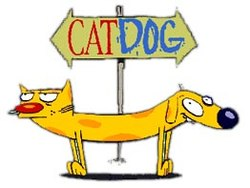

In [55]:
import PIL
from PIL import Image

In [56]:
import os
train_dogs_dir = os.path.join('E:/cnn_imgs_dataset/training_set/dogs')
train_cats_dir = os.path.join('E:/cnn_imgs_dataset/training_set/cats')

In [57]:
print(train_dogs_dir)
print(train_cats_dir)

E:/cnn_imgs_dataset/training_set/dogs
E:/cnn_imgs_dataset/training_set/cats


In [58]:
validation_dogs_dir = os.path.join('E:/cnn_imgs_dataset/test_set/dogs')
validation_cats_dir = os.path.join('E:/cnn_imgs_dataset/test_set/cats')

In [59]:
print(validation_dogs_dir)
print(validation_cats_dir)

E:/cnn_imgs_dataset/test_set/dogs
E:/cnn_imgs_dataset/test_set/cats


In [60]:
print('Total training dogs images: ', len(os.listdir(train_dogs_dir)))
print('Total training cats images: ', len(os.listdir(train_cats_dir)))

Total training dogs images:  3762
Total training cats images:  4000


In [61]:
print('Total Validation dogs images: ', len(os.listdir(validation_dogs_dir)))
print('Total Validation cats images: ', len(os.listdir(validation_cats_dir)))

Total Validation dogs images:  1000
Total Validation cats images:  1000


In [62]:
train_dogs_name=os.listdir(train_dogs_dir)
train_cats_name=os.listdir(train_cats_dir)
print(train_dogs_name[:10])
print(train_cats_name[:10])

['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']
['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']


In [63]:
validation_dogs_name=os.listdir(validation_dogs_dir)
validation_cats_name=os.listdir(validation_cats_dir)
print(validation_dogs_name[:10])
print(validation_cats_name[:10])

['dog.4001.jpg', 'dog.4002.jpg', 'dog.4003.jpg', 'dog.4004.jpg', 'dog.4005.jpg', 'dog.4006.jpg', 'dog.4007.jpg', 'dog.4008.jpg', 'dog.4009.jpg', 'dog.4010.jpg']
['cat.4001.jpg', 'cat.4002.jpg', 'cat.4003.jpg', 'cat.4004.jpg', 'cat.4005.jpg', 'cat.4006.jpg', 'cat.4007.jpg', 'cat.4008.jpg', 'cat.4009.jpg', 'cat.4010.jpg']


In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import random

# Declearing parameters for rows and col
ncols=4
nrows=4

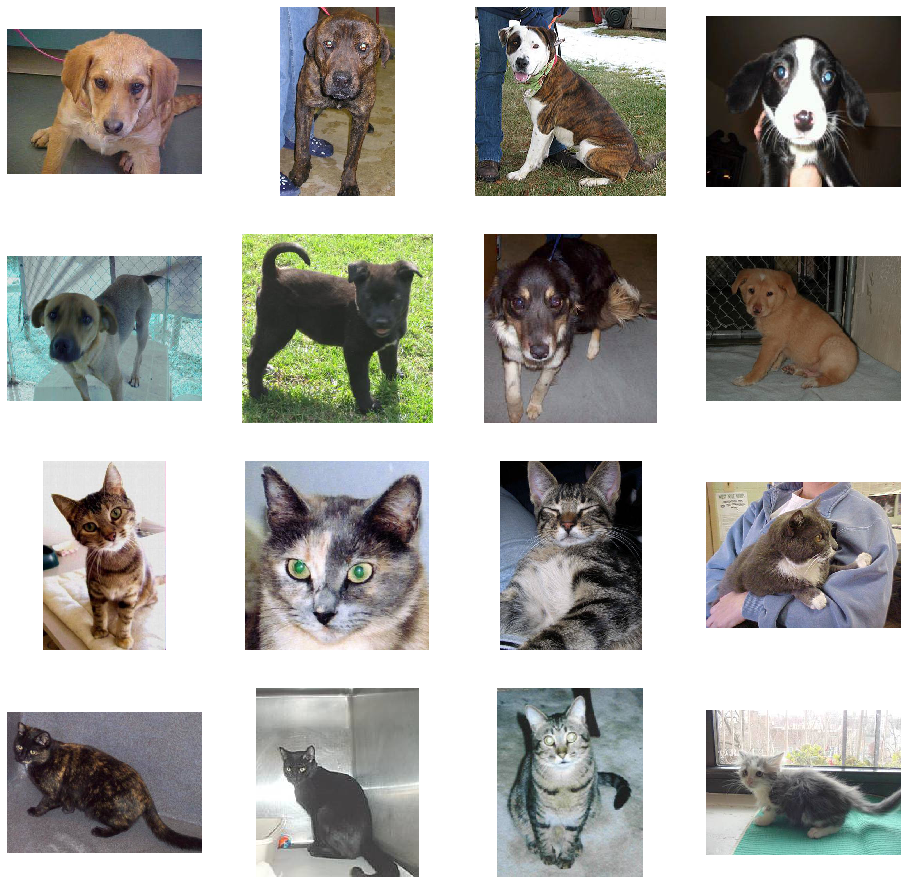

In [65]:
# Picking the ransom no of images form total set
pic_dogs_index = random.randrange(0,3750)
pic_cats_index = random.randrange(0,3990)

# Set up a matploit fig and size it to fit 4*4
fig = plt.gcf()   # get current figure if not it creates
fig.set_size_inches(ncols*4,nrows*4)  # Defining the fig

next_dog = [os.path.join(train_dogs_dir, fname)
           for fname in train_dogs_name[pic_dogs_index-8:pic_dogs_index]]
next_cat = [os.path.join(train_cats_dir, fname)
           for fname in train_cats_name[pic_cats_index-8:pic_cats_index]]

for i,img_path in enumerate(next_dog+next_cat):
    sp=plt.subplot(ncols,nrows, i+1)   # Drawing subplots of 4 x 4 with i itteration and making next subplot
    sp.axis('off')# Grid type not shown
    img = npimg.imread(img_path)
    plt.imshow(img)
plt.show()    



In [66]:
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3


local_weights_file='C:/Users/Pankaj Mahtolia/Desktop/ML/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model= InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                               weights= None)
pre_trained_model.load_weights(local_weights_file)




for layers in pre_trained_model.layers:
    layers.trainable = False
    
pre_trained_model.summary()   


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_752 (Conv2D)             (None, 74, 74, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_752 (Bat (None, 74, 74, 32)   96          conv2d_752[0][0]                 
__________________________________________________________________________________________________
activation_752 (Activation)     (None, 74, 74, 32)   0           batch_normalization_v1_752[0][0] 
__________________________________________________________________________________________________
conv2d_753

In [67]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [32]:
"""import tensorflow as tf
# Defining the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1 ,activation='sigmoid')])
"""                                   

"import tensorflow as tf\n# Defining the model\nmodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),\n                                   tf.keras.layers.MaxPooling2D(2,2),\n                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),\n                                   tf.keras.layers.MaxPooling2D(2,2),\n                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),\n                                   tf.keras.layers.MaxPooling2D(2,2),\n                                   tf.keras.layers.Flatten(),\n                                   tf.keras.layers.Dense(512,activation='relu'),\n                                   tf.keras.layers.Dense(1 ,activation='sigmoid')])\n"

In [33]:
#model.summary()

In [68]:
# compliling the model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           


#pre_trained_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [69]:
# using Image Data Generator for rescaling and making train set and validation set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./225,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./225)

In [70]:
training_set = train_datagen.flow_from_directory('E:/cnn_imgs_dataset/training_set',target_size=(150,150),batch_size=20,class_mode='binary')

Found 7762 images belonging to 2 classes.


In [71]:
validation_set = validation_datagen.flow_from_directory('E:/cnn_imgs_dataset/test_set',target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [76]:
model.fit_generator(training_set,steps_per_epoch=100,epochs=3,
                                 validation_data = validation_set,validation_steps=50)

Epoch 1/3
389/389 [==============================] - 599s 2s/step - loss: 0.4032 - acc: 0.8190 - val_loss: 0.2196 - val_acc: 0.9505
Epoch 2/3
389/389 [==============================] - 601s 2s/step - loss: 0.3334 - acc: 0.8624 - val_loss: 0.2416 - val_acc: 0.9555
Epoch 3/3
389/389 [==============================] - 645s 2s/step - loss: 0.3018 - acc: 0.8754 - val_loss: 0.2692 - val_acc: 0.9615


Using TensorFlow backend.


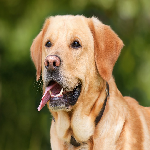

In [77]:
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
test_image = image.load_img('E:/cnn_imgs_dataset/single_prediction/dog2.jpg', target_size=(150,150))
test_image

In [78]:
x=image.img_to_array(test_image)
x=np.expand_dims(x,axis=0) 

In [79]:
x=preprocess_input(x)   # preprocessing with vgg16


In [80]:
classes = model.predict(x)

In [81]:
print(classes[0][0])

1.0


In [82]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [83]:
if classes[0][0] == 1:
    print('Its a Dog')
else:
    print('Its a cat')

Its a Dog


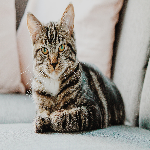

In [85]:
test_image = image.load_img('E:/cnn_imgs_dataset/single_prediction/cat1.jpg', target_size=(150,150))
test_image




In [86]:
x=image.img_to_array(test_image)
x=np.expand_dims(x,axis=0)



x=preprocess_input(x)   # preprocessing with vgg16

classes = model.predict(x)

In [87]:
print(classes[0][0])

0.0


In [88]:
if classes[0][0] == 1:
    print('Its a Dog')
else:
    print('Its a cat')

Its a cat
